In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

def one_hot(y):
    
    y_oht = np.zeros((y.shape[0],2))
    y_oht[np.arange(y.shape[0]),y]=1
    
    return y_oht 

In [3]:
x=np.array([[2,1,4,5]])
softmax(x)

array([[0.03467109, 0.01275478, 0.25618664, 0.69638749]])

In [4]:
input_size = 2
layers = [4,3]
output = 2

In [5]:

class NeuralNetwork():
     
    
    def __init__(self,input_size,layers,output):  
        
        model = {}
       

        model["w1"] = np.random.randn(input_size,layers[0])
        model["b1"] = np.zeros((1,layers[0]))

        model["w2"] = np.random.randn(layers[0],layers[1])
        model["b2"] = np.zeros((1,layers[1]))

        model["w3"] = np.random.randn(layers[1],output)
        model["b3"] = np.zeros((1,output))

        self.model = model
        '''
        w1,w2,w3,b1,b2,b3 are weight and bias matrix of 1st,2nd and 3rd layers
        and b(i) is broadcasted to m examles
        '''
    def forward(self,x):
        
         
        self.activation_outputs =()                     
                              
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']                    
            
        z1 = np.dot(x,w1)+ b1 
        a1 = np.tanh(z1)
                              
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2) 
                            
        z3 = np.dot(a2,w3) + b3
        y_ = softmax(z3)
                              
        self.actication_outputs = (a1,a2,y_)
        return y_
                              
                              
                              
    def backward(self,X,y,lr=0.005):
        
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        y_oht = one_hot(y) 
        m = X.shape[0]
        model = self.model                     
        a1,a2,y_ = self.actication_outputs
                              
        delta3 = y_ - y_oht
                              
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)

        delta2 = np.dot(delta3,w3.T)*(1-np.square(a2))

        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)

        delta1 = np.dot(delta2,w2.T)*(1-np.square(a1))

        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
                              
         ##Gradient Descent
                              
        self.model['w1'] -= lr*dw1              
        self.model['b1'] -= lr*db1
                              
        self.model['w2'] -= lr*dw2
        self.model['b2'] -= lr*db2
                                                 
        self.model['w3'] -= lr*dw3
        self.model['b3'] -= lr*db3                            
                              
                              
    def pred(self,X):
        
        y_pred = self.forward(X)
                              
        return np.argmax(y_pred,axis=1)
                              
                              
                              
    def loss(self,y,pred):
        
        y_oht = one_hot(y)
        return -1*np.mean(y_oht*np.log(pred))
                              
                              
    def summary(self):
        
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_ = self.actication_outputs
        
        print("w1",w1.shape)
        print("activation 1",a1.shape)
        print("w2",w2.shape)
        print("activation 2",a1.shape)
        print("w3",w3.shape)
        print("activation 3",a1.shape)
            
        
    def train(self,X,y,lr,epoch):
        
        losses = []
        for ix in range(epoch):
            
            preds = self.forward(X)
            l = self.loss(y,preds)
            losses.append(l)
            self.backward(X,y,lr)
            
        return losses   

In [6]:
X,y = make_circles(n_samples=500,
    shuffle=True,
    noise=0.1,
    random_state=1,
    factor=0.2)

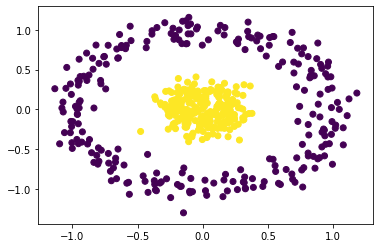

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
net = NeuralNetwork(2,[4,3],2)
losses = net.train(X,y,0.001,500)

In [9]:
losses

[0.41797523091507155,
 0.37049648981241284,
 0.353333585149638,
 0.34566022288996684,
 0.34135353660008594,
 0.33819493566963127,
 0.3353665574459662,
 0.3325748981327022,
 0.3297196838698482,
 0.32677048010872317,
 0.32371985746209575,
 0.3205655040862974,
 0.31730454628445964,
 0.31393334764587294,
 0.3104493204383403,
 0.3068527771783739,
 0.3031478482914235,
 0.29934220229821673,
 0.29544578258281673,
 0.29146905436906717,
 0.2874213357522851,
 0.2833096729073846,
 0.2791384770628633,
 0.27490988094791535,
 0.2706245896929619,
 0.26628292954335303,
 0.26188581785443127,
 0.25743545030856496,
 0.25293559226028955,
 0.24839144931309445,
 0.24380916561271773,
 0.23919504985500176,
 0.23455465533753703,
 0.22989184257356465,
 0.2252079365905896,
 0.2205010647001949,
 0.2157657334077944,
 0.2109926823241705,
 0.20616904177199727,
 0.2012788182388331,
 0.19630373294052766,
 0.19122443571571193,
 0.18602210046466336,
 0.18068037210769541,
 0.1751875757974851,
 0.16953902144658695,
 0.1637

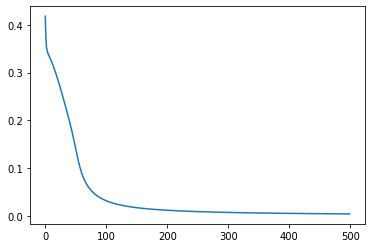

In [10]:
plt.plot(losses)

In [11]:
pred = net.pred(X)

In [12]:
pred.shape

(500,)

In [13]:
100*np.sum(pred==y)/y.shape[0]

100.0

In [14]:
net.forward(X)

array([[5.42142724e-03, 9.94578573e-01],
       [2.21813803e-03, 9.97781862e-01],
       [9.90667842e-01, 9.33215836e-03],
       [9.99536294e-01, 4.63705655e-04],
       [5.60097826e-03, 9.94399022e-01],
       [3.29571604e-03, 9.96704284e-01],
       [2.99214353e-03, 9.97007856e-01],
       [9.90815301e-01, 9.18469872e-03],
       [9.91918984e-01, 8.08101607e-03],
       [9.99890171e-01, 1.09829212e-04],
       [3.83417080e-03, 9.96165829e-01],
       [9.84092425e-01, 1.59075747e-02],
       [9.81193280e-01, 1.88067204e-02],
       [9.98733929e-01, 1.26607116e-03],
       [4.62789421e-03, 9.95372106e-01],
       [9.97518295e-01, 2.48170548e-03],
       [1.94530217e-03, 9.98054698e-01],
       [2.27439534e-03, 9.97725605e-01],
       [9.84586088e-01, 1.54139121e-02],
       [9.79942024e-01, 2.00579755e-02],
       [2.99061498e-03, 9.97009385e-01],
       [3.78549549e-03, 9.96214505e-01],
       [2.00094008e-03, 9.97999060e-01],
       [3.39194661e-03, 9.96608053e-01],
       [9.975427

In [15]:
net.summary()

w1 (2, 4)
activation 1 (500, 4)
w2 (4, 3)
activation 2 (500, 4)
w3 (3, 2)
activation 3 (500, 4)


In [16]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

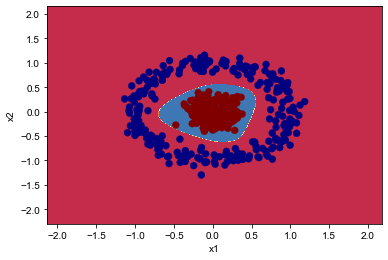

In [17]:
plot_decision_boundary(lambda x:net.pred(x),X,y)

# XOR Dataset

In [245]:
a = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
b = np.array([0,1,1,0])

In [247]:
net = NeuralNetwork(2,[4,3],2)
losses = net.train(a,b,0.05,500)

In [248]:
losses

[0.33445620229993345,
 0.3014810771579358,
 0.2870447990036522,
 0.2784035831133813,
 0.2718977028995512,
 0.2663420036929496,
 0.26132381205327593,
 0.2566855365312202,
 0.2523556105271757,
 0.24829164892698818,
 0.24446110640058644,
 0.24083465118444447,
 0.23738383645309952,
 0.23408016454513714,
 0.2308945309484674,
 0.22779669444344852,
 0.22475465397703204,
 0.2217339016688482,
 0.2186965678066159,
 0.21560052238831157,
 0.21239857639819582,
 0.2090380586685488,
 0.20546124861094062,
 0.2016074087520362,
 0.19741738293987507,
 0.19284162633874086,
 0.18785161417476132,
 0.18245239873886454,
 0.17669117073928334,
 0.17065551946880625,
 0.16445890601572033,
 0.15821884128224978,
 0.15203823462307847,
 0.145996739622233,
 0.1401510535960251,
 0.1345391525604384,
 0.12918469947769068,
 0.12410043403313178,
 0.11929069114615182,
 0.11475339888932853,
 0.11048174781786495,
 0.10646559287448969,
 0.10269260290129745,
 0.09914917154710369,
 0.09582111334643864,
 0.09269417617040712,
 0.0

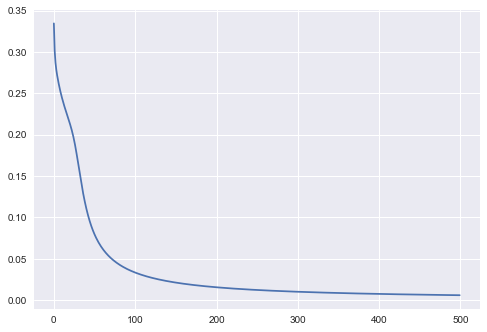

In [249]:
plt.plot(losses)

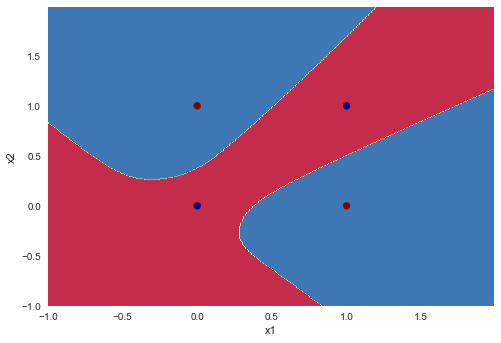

In [250]:
plot_decision_boundary(lambda x:net.pred(x),a,b)

In [251]:
from sklearn.datasets import make_blobs,make_moons

In [252]:
samples = [
    make_circles(n_samples=500,shuffle=True,noise=0.1,random_state=1,factor=0.2),
    #make_blobs(n_samples=500,n_features=2,random_state=1),
    make_moons(n_samples=500,noise=0.1, random_state=1)
    ]

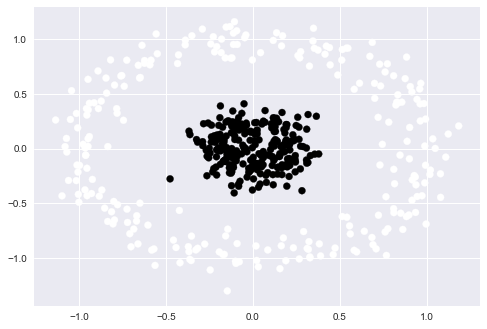

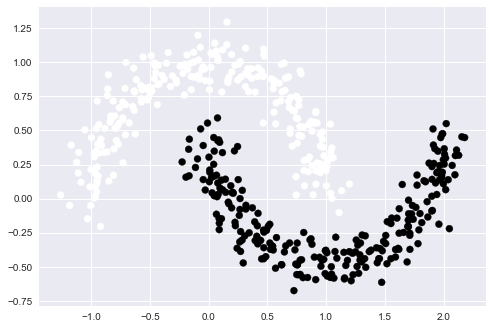

In [253]:
for sample in samples:
    
    m,n = sample
    plt.scatter(m[:,0],m[:,1],c=n)
    plt.show()

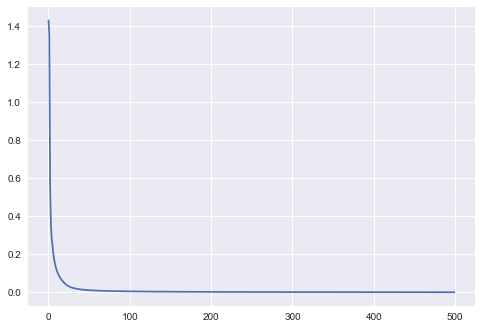

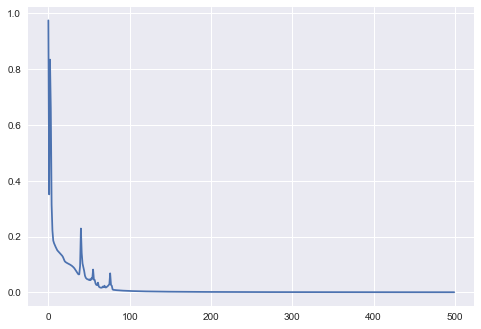

In [254]:
for sample in samples:
    
    m,n = sample
    losses = net.train(m, n, 0.003, 500)
    plt.plot(losses)
    plt.show()

/Users/paruldiwakar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


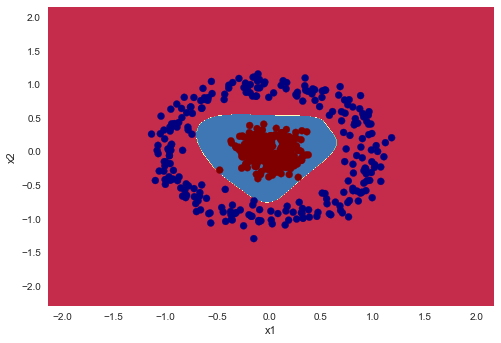

/Users/paruldiwakar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


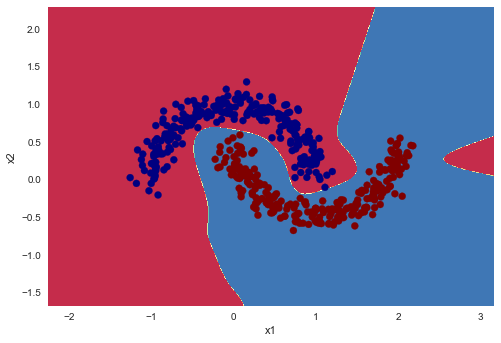

In [255]:

for sample in samples:
    
    m,n = sample
    losses = net.train(m, n, 0.003, 500)
    100*np.sum(pred==m)/n.shape[0]
    plot_decision_boundary(lambda x:net.pred(x),m,n)
    plt.show()